Saving stock_data_big.csv to stock_data_big (1).csv
         Date    Open    High     Low   Close   Volume
0  2020-01-01  249.82  256.45  247.87  255.06  3296247
1  2020-01-02  480.29  489.26  473.38  486.16  1939050
2  2020-01-03  392.80  399.34  384.40  396.70  2770492
3  2020-01-06  339.46  342.56  335.04  342.05  2555257
4  2020-01-07  162.41  163.63  154.43  159.44  3077299

Mean Squared Error: 10.208543210007566
R2 Score: 0.9992601033703946


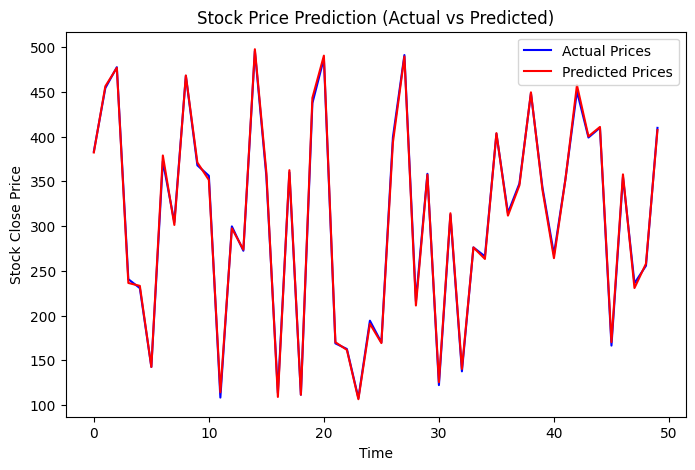

In [6]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("/content/stock_data_big.csv")

print(data.head())

X = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("\nMean Squared Error:", mean_squared_error(y_test, predictions))
print("R2 Score:", r2_score(y_test, predictions))

plt.figure(figsize=(8,5))
plt.plot(y_test.values[:50], label='Actual Prices', color='blue')
plt.plot(predictions[:50], label='Predicted Prices', color='red')
plt.title("Stock Price Prediction (Actual vs Predicted)")
plt.xlabel("Time")
plt.ylabel("Stock Close Price")
plt.legend()
plt.show()

Saving tweets_big.csv to tweets_big (1).csv
Sentiment
Negative    39944
Positive    33336
Neutral     26720
Name: count, dtype: int64


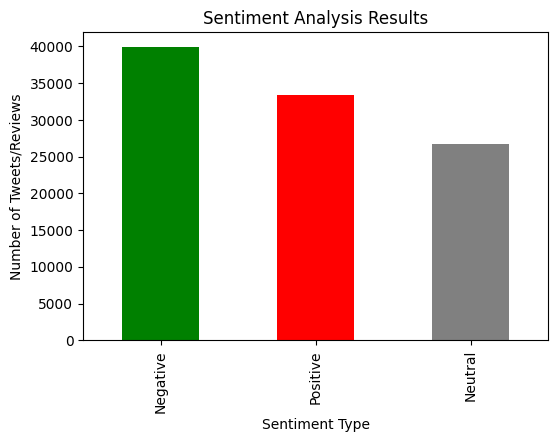


Sample Results:
                                                text Sentiment
0                                   Watching TV now.   Neutral
1                      Just finished my lunch break.   Neutral
2  The new update is awesome, super smooth and fast.  Positive
3                      Just finished my lunch break.   Neutral
4      The service was slow and the staff were rude.  Negative


In [5]:

from google.colab import files
uploaded = files.upload()
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

data = pd.read_csv("/content/tweets_big.csv")

def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"


data["Sentiment"] = data["text"].apply(get_sentiment)

sentiment_counts = data["Sentiment"].value_counts()
print(sentiment_counts)

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green','red','gray'])
plt.title("Sentiment Analysis Results")
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Tweets/Reviews")
plt.show()

print("\nSample Results:")
print(data[["text", "Sentiment"]].head())